In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
import datetime
import simplekml

In [2]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

## Data import
We import the csv file.
We are interested in the  Ping_index , Ping_date , Ping_time , Latitude,  Longitude , and the sv* columns.
Each sv* column corresponds to a depth.
The value for each cell is the logarithm of the intensity of the echo.(ratio of intensity)

In [3]:
data_path = '/home/benjamin/Documents/datascience/ACE/test/'
data_path = '/home/benjamin/Documents/datascience/ACE/'

### Filtering

In [4]:
%%time
import glob
global_swarm_list = []
list_of_depthchange = []
list_of_errors = []
list_of_dates = []
global_info_path = []
for filename in glob.iglob(data_path+'*.csv'):
    print('Loading data ...')
    print('%s' % filename)
    try:
        info_df,echogram,depth_data = ACE_box.extract_data(filename,150)
        if depth_data['depth_change']:
            list_of_depthchange.append(filename)
        print('Start date:',info_df.Ping_date[0],info_df.Ping_time[0])
        print('End date:',info_df.Ping_date[len(info_df.Ping_time)-1],info_df.Ping_time[len(info_df.Ping_time)-1])
        list_of_dates.append((info_df.Ping_date[0],info_df.Ping_time[0],
                             info_df.Ping_date[len(info_df.Ping_time)-1],info_df.Ping_time[len(info_df.Ping_time)-1]
                            ))
        print('Latitude',info_df.Latitude[5])
        print('------------------------')
        print('Filtering data...')
        denoised = ACE_box.filter_data(echogram)
        print('Finding krill swarms...')
        krillsignal,energy_fluctuation = ACE_box.krill_function(denoised,1)
        print('Energy fluctuation:',energy_fluctuation)
        swarm_echo_list = ACE_box.extract_krillchunks(krillsignal,denoised)
        print("Nb of swarms found: ",len(swarm_echo_list))
        print('Extracting swarm information...')
        swarm_list = ACE_box.info_from_swarm_list(swarm_echo_list,echogram,info_df,depth_data,filename)
        print('Done.')
        print('+++++++++++++')
        global_swarm_list += swarm_list
        
    except:
        print("""
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ERROR: Could not process file {}
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            """.format(filename))
        list_of_errors.append(filename)
        continue
    info_path_list = ACE_box.info_path(info_df)
    global_info_path.append(info_path_list)
            

Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170217-T230012.sv.csv
------------------------------
Data matrix size: (2688, 9249)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -56.36 dB.
-----------------------------
Start date: 2017-02-17 23:00:12
End date: 2017-02-18 02:00:13
Latitude -64.13891113
------------------------
Filtering data...
Number of noisy pixels removed:  1983552
Number of noisy pixels removed:  2406497
Finding krill swarms...
Energy fluctuation: 4.38968978669
Nb of swarms found:  60
Extracting swarm information...
Number of noisy pixels removed:  1613957
Number of noisy pixels removed:  2164280
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170212-T103929.sv.csv
------------------------------
Data matrix size: (2690, 5037)
Start de

Finding krill swarms...
Energy fluctuation: 1.019686032
Nb of swarms found:  284
Extracting swarm information...
Number of noisy pixels removed:  1741101
Number of noisy pixels removed:  1968174
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170214-T025444.sv.csv
------------------------------
Data matrix size: (2688, 9159)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -59.29 dB.
-----------------------------
Start date: 2017-02-14 02:54:44
End date: 2017-02-14 06:24:46
Latitude -69.9999511
------------------------
Filtering data...
Number of noisy pixels removed:  1896899
Number of noisy pixels removed:  2388957
Finding krill swarms...
Energy fluctuation: 0.522736142411
Nb of swarms found:  308
Extracting swarm information...
Number of noisy pixels removed:  1167034
Num

------------------------------
Data matrix size: (2690, 5639)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.3016973
Nb of pixels along depth axis: 2690
Depth per pixel (in meters): 0.185579519532
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -57.73 dB.
-----------------------------
Start date: 2017-02-10 22:38:21
End date: 2017-02-11 00:47:55
Latitude -72.84138656
------------------------
Filtering data...
Number of noisy pixels removed:  1071895
Number of noisy pixels removed:  1407069
Finding krill swarms...
Energy fluctuation: 1.72206671395
Nb of swarms found:  17
Extracting swarm information...
Number of noisy pixels removed:  620590
Number of noisy pixels removed:  1203545
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170219-T193639.sv.csv
------------------------------
Data matrix size: (2688, 9271)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth 

Finding krill swarms...
Energy fluctuation: 1.56730699394
Nb of swarms found:  44
Extracting swarm information...
Number of noisy pixels removed:  171459
Number of noisy pixels removed:  192683
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170217-T200313.sv.csv
------------------------------
Data matrix size: (2688, 9242)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -57.75 dB.
-----------------------------
Start date: 2017-02-17 20:03:13
End date: 2017-02-17 23:00:12
Latitude -64.36717577
------------------------
Filtering data...
Number of noisy pixels removed:  1907257
Number of noisy pixels removed:  2379980
Finding krill swarms...
Energy fluctuation: 1.76710175589
Nb of swarms found:  386
Extracting swarm information...
Number of noisy pixels removed:  1752454
Numb

Number of noisy pixels removed:  1890623
Number of noisy pixels removed:  2418495
Finding krill swarms...
Energy fluctuation: 0.835513002105
Nb of swarms found:  58
Extracting swarm information...
Number of noisy pixels removed:  1689946
Number of noisy pixels removed:  2162374
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170219-T060719.sv.csv
------------------------------
Data matrix size: (2688, 9204)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -56.68 dB.
-----------------------------
Start date: 2017-02-19 06:07:19
End date: 2017-02-19 09:19:25
Latitude -59.17355417
------------------------
Filtering data...
Number of noisy pixels removed:  1827602
Number of noisy pixels removed:  2499063
Finding krill swarms...
Energy fluctuation: 0.548171977038
Nb of swarms fou

Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170211-T204410.sv.csv
------------------------------
Data matrix size: (2690, 9201)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.3016973
Nb of pixels along depth axis: 2690
Depth per pixel (in meters): 0.185579519532
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -55.09 dB.
-----------------------------
Start date: 2017-02-11 20:44:10
End date: 2017-02-12 00:09:21
Latitude -73.16141829
------------------------
Filtering data...
Number of noisy pixels removed:  1957947
Number of noisy pixels removed:  2514657
Finding krill swarms...
Energy fluctuation: 3.44146743845
Nb of swarms found:  70
Extracting swarm information...
Number of noisy pixels removed:  1253668
Number of noisy pixels removed:  2191579
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170217-T081013.sv.csv
------------------------------
Data matrix size: (

Number of noisy pixels removed:  2397118
Finding krill swarms...
Energy fluctuation: 4.36756193617
Nb of swarms found:  53
Extracting swarm information...
Number of noisy pixels removed:  1336329
Number of noisy pixels removed:  2086364
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T091856.sv.csv
------------------------------
Data matrix size: (2688, 9414)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -43062218023416271381013014868618379264.00 dB.
-----------------------------
Start date: 2017-02-20 09:18:56
End date: 2017-02-20 11:08:50
Latitude -56.49433547
------------------------
Filtering data...
Number of noisy pixels removed:  43073
Number of noisy pixels removed:  29064
Finding krill swarms...
Energy fluctuation: 8.5659216561
Nb of swarms found:  20
Extr

Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -41.61 dB.
-----------------------------
Start date: 2017-02-09 15:46:02
End date: 2017-02-09 19:15:52
Latitude -71.32658694
------------------------
Filtering data...
Number of noisy pixels removed:  2312778
Number of noisy pixels removed:  2496676
Finding krill swarms...
Energy fluctuation: 1.88742839756
Nb of swarms found:  1118
Extracting swarm information...
Number of noisy pixels removed:  2178471
Number of noisy pixels removed:  2323006
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170215-T210616.sv.csv
------------------------------
Data matrix size: (2688, 1992)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -56.68 dB.
-----------------------------
Start date: 2017-02-15 21:06:16
End date:

------------------------------
Data matrix size: (2688, 9174)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -56.38 dB.
-----------------------------
Start date: 2017-02-19 12:40:18
End date: 2017-02-19 16:05:28
Latitude -57.57739691
------------------------
Filtering data...
Number of noisy pixels removed:  1856047
Number of noisy pixels removed:  2454828
Finding krill swarms...
Energy fluctuation: 0.765774300439
Nb of swarms found:  576
Extracting swarm information...
Number of noisy pixels removed:  1606895
Number of noisy pixels removed:  1911177
Done.
+++++++++++++
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170207-T210420.sv.csv
------------------------------
Data matrix size: (2693, 3729)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along dep

Start depth (in meters): 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -86.0330

Stop depth (in meters): 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -86.03303

Nb of pixels along depth axis: 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -8

Depth per pixel (in meters): 0.0  2852.395  2017-02-18  05:00:15  980.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  69.168179  69.262251  69.473912  63.606179  -10.169688  -27.796405  -28.384354  -33.242439  -35.734061  -40.862407  -53.335799  -59.708349  -51.551776  -59.812275  -64.052935  -57.903165  -64.309384  -61.923296  -64.415905  -59.989061  -61.80957  -66.441052  -65.555794  -64.796086  -71.968138  -66.797933  -66.099476  -66.567308  -65.013694  -68.128561  -67.809131  -67.429482  -65.08398  -67.827402  -70.908562  -69.423457  -89.264907  -72.848743  -71.067461  -68.53995  -74.7789  -86.467972  -77.207964  -76.595979  -82.997274  -79.020084  -91.733381  -71.855064  -73.123506  -80.228337  -81.339857  -83.583858  -72.461369  -75.417725  -76.531132  -76.307108  -70.970905  -77.255451  -85.247819  -78.414782  -71.831266  -76.221378  -72.805937  -77.189038  -82.620948  -74.297035  -71.948807  -71.04899  -71.738631  -71.630595  -78.262336  -79.47501  -75.480227  -86.


            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ERROR: Could not process file /home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T050015.sv.csv
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T000950.sv.csv
------------------------------
Data matrix size: (2688, 9402)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -56871698013657581978019130874349486080.00 dB.
-----------------------------
Start date: 2017-02-20 00:09:50
End date: 2017-02-20 01:59:39
Latitude -55.26191942
------------------------
Filtering data...
Number of noisy pixels removed:  15888
Number of noisy pixels removed:  13868
Finding krill swarms...
Energy fluctuation: 20.8216158153
Nb of swarms found:  1
Extracting swarm information...
Number of 

Stop depth (in meters): 0.0  3436.848  2017-02-20  03:49:30  851.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  68.756614  68.838927  69.027071  63.194615  -10.36959  -30.771428  -56.288424  -34.665276  -38.274001  -43.296517  -47.820836  -53.334979  -56.267129  -53.685844  -55.927477  -54.704722  -66.955156  -59.783161  -68.602103  -62.999361  -59.857578  -62.454756  -65.932082  -61.785786  -76.271926  -78.098317  -65.229311  -60.970032  -65.836823  -70.856645  -65.727791  -62.584781  -65.025185  -66.204662  -76.341213  -84.345608  -73.872397  -77.893347  -71.949384  -66.787861  -65.030702  -77.860395  -72.527889  -71.527857  -68.239748  -67.896085  -74.988587  -73.63067  -79.978994  -78.440972  -71.227131  -73.153639  -66.193831  -72.078173  -84.950565  -72.403125  -87.104232  -74.621438  -72.73626  -73.393695  -78.357502  -77.185614  -81.601657  -70.639283  -66.746319  -70.581196  -72.454443  -72.119058  -73.090914  -75.840311  -71.653787  -74.818452  -71.929014  -77.3

Nb of pixels along depth axis: 0.0  3436.848  2017-02-20  03:49:30  851.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  68.756614  68.838927  69.027071  63.194615  -10.36959  -30.771428  -56.288424  -34.665276  -38.274001  -43.296517  -47.820836  -53.334979  -56.267129  -53.685844  -55.927477  -54.704722  -66.955156  -59.783161  -68.602103  -62.999361  -59.857578  -62.454756  -65.932082  -61.785786  -76.271926  -78.098317  -65.229311  -60.970032  -65.836823  -70.856645  -65.727791  -62.584781  -65.025185  -66.204662  -76.341213  -84.345608  -73.872397  -77.893347  -71.949384  -66.787861  -65.030702  -77.860395  -72.527889  -71.527857  -68.239748  -67.896085  -74.988587  -73.63067  -79.978994  -78.440972  -71.227131  -73.153639  -66.193831  -72.078173  -84.950565  -72.403125  -87.104232  -74.621438  -72.73626  -73.393695  -78.357502  -77.185614  -81.601657  -70.639283  -66.746319  -70.581196  -72.454443  -72.119058  -73.090914  -75.840311  -71.653787  -74.818452  -71.929014

Depth per pixel (in meters): 0.0  3436.848  2017-02-20  03:49:30  851.0  0.0  0.0  0.09279  498.930538  0.09279  498.930538  2688  68.756614  68.838927  69.027071  63.194615  -10.36959  -30.771428  -56.288424  -34.665276  -38.274001  -43.296517  -47.820836  -53.334979  -56.267129  -53.685844  -55.927477  -54.704722  -66.955156  -59.783161  -68.602103  -62.999361  -59.857578  -62.454756  -65.932082  -61.785786  -76.271926  -78.098317  -65.229311  -60.970032  -65.836823  -70.856645  -65.727791  -62.584781  -65.025185  -66.204662  -76.341213  -84.345608  -73.872397  -77.893347  -71.949384  -66.787861  -65.030702  -77.860395  -72.527889  -71.527857  -68.239748  -67.896085  -74.988587  -73.63067  -79.978994  -78.440972  -71.227131  -73.153639  -66.193831  -72.078173  -84.950565  -72.403125  -87.104232  -74.621438  -72.73626  -73.393695  -78.357502  -77.185614  -81.601657  -70.639283  -66.746319  -70.581196  -72.454443  -72.119058  -73.090914  -75.840311  -71.653787  -74.818452  -71.929014  


            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            ERROR: Could not process file /home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T053918.sv.csv
            !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            
Loading data ...
/home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T080059.sv.csv
------------------------------
Data matrix size: (2688, 9247)
Start depth (in meters): 0.09278976
Stop depth (in meters): 498.9305383
Nb of pixels along depth axis: 2688
Depth per pixel (in meters): 0.185579519546
Echogram truncated to the first 150 meters (762 pixels).
Mean data value: -56.13 dB.
-----------------------------
Start date: 2017-02-18 08:00:59
End date: 2017-02-18 11:01:40
Latitude -62.8915845
------------------------
Filtering data...
Number of noisy pixels removed:  1806074
Number of noisy pixels removed:  2441657
Finding krill swarms...
Energy fluctuation: 4.3750172198
Nb of swarms found:  63
Extracting swarm information...
Number of noisy pixels removed:  1554207
Nu

In [5]:
global_swarm_list_full = global_swarm_list.copy()
len(global_swarm_list)

18421

In [6]:
list_of_errors

['/home/benjamin/Documents/datascience/ACE/ACE_-D20170218-T050015.sv.csv',
 '/home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T053918.sv.csv']

In [7]:
list_of_depthchange

['/home/benjamin/Documents/datascience/ACE/ACE_-D20170215-T070146.sv.csv',
 '/home/benjamin/Documents/datascience/ACE/ACE_-D20170220-T130430.sv.csv',
 '/home/benjamin/Documents/datascience/ACE/ACE_-D20170210-T184331.sv.csv']

In [8]:
ACE_box.missing_time_slots(list_of_dates)

Missing time slots:
From  2017-02-08 20:58:31  to  2017-02-09 01:45:58
From  2017-02-09 23:02:03  to  2017-02-10 02:35:34
From  2017-02-11 00:47:55  to  2017-02-11 09:26:07
From  2017-02-11 11:15:23  to  2017-02-11 20:44:10
From  2017-02-12 12:34:49  to  2017-02-13 23:25:08
From  2017-02-15 03:43:55  to  2017-02-15 05:36:28
From  2017-02-15 07:19:15  to  2017-02-15 07:27:08
From  2017-02-15 07:43:19  to  2017-02-15 10:46:32
From  2017-02-15 21:44:08  to  2017-02-16 00:24:05
From  2017-02-16 08:49:52  to  2017-02-17 02:52:40
From  2017-02-18 05:00:14  to  2017-02-18 08:00:59
From  2017-02-20 03:49:30  to  2017-02-20 07:29:06


In [10]:
ACE_box.path_to_KML(global_info_path,'ACE_map.kml')

data saved in file ACE_map.kml.


In [85]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [28]:
global_swarm_list = [swarm for swarm in global_swarm_list_full if swarm['gradient']>3 
                     and swarm['biomass_per_pixel']>-110
                     and swarm['biomass_per_pixel']<-40
                    ]
len(global_swarm_list)

372

In [86]:
global_swarm_list = ACE_box.remove_bad_swarms(global_swarm_list_full) 

Initial nb of swarms: 18421, final nb of swarms: 264.


In [29]:
import json
with open('krill_data.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(global_swarm_list, ensure_ascii=False))

In [87]:
import csv
keys = global_swarm_list[0].keys()
with open('swarms.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(global_swarm_list)

<IPython.core.display.Javascript object>


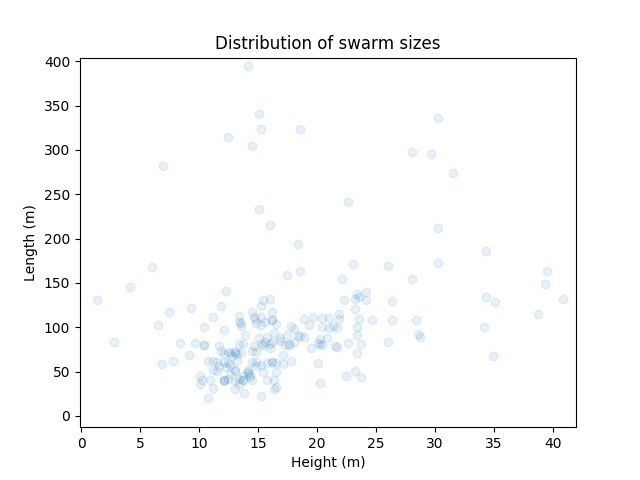

Text(0.5,1,'Distribution of swarm sizes')

In [88]:
%matplotlib notebook
H,L = [],[]
for swarm in global_swarm_list:
    if swarm['length']>0 and swarm['height']>0 and swarm['depth']<80:
        H.append(swarm['height'])
        L.append(swarm['length'])
plt.figure()
if len(global_swarm_list)<600:
    plt.scatter(H,L,alpha=0.1)
else:
    plt.hist2d(H, L, bins=(100, 40), cmap=plt.cm.jet)
plt.xlabel('Height (m)')
plt.ylabel('Length (m)')
plt.title('Distribution of swarm sizes')

<IPython.core.display.Javascript object>


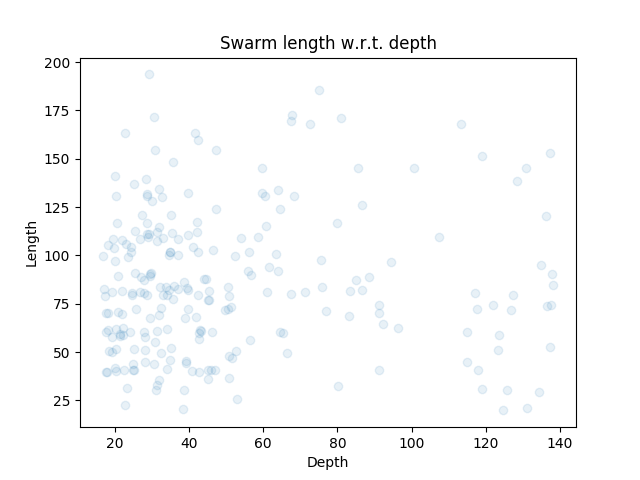

Text(0.5,1,'Swarm length w.r.t. depth')

In [89]:
D,L = [],[]
for swarm in global_swarm_list:
    if swarm['length']>0 and swarm['height']>0 and swarm['depth']<140 and swarm['length']<200:
        D.append(swarm['depth'])
        L.append(swarm['length'])
plt.figure()
if len(global_swarm_list)<600:
    plt.scatter(D,L,alpha=0.1)
else:
    plt.hist2d(D, L, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Depth')
plt.ylabel('Length')
plt.title('Swarm length w.r.t. depth')

<IPython.core.display.Javascript object>


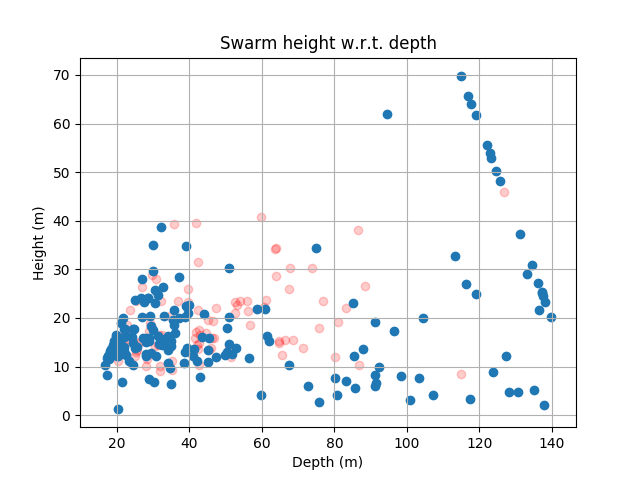

Text(0.5,1,'Swarm height w.r.t. depth')

In [90]:
D,H = [],[]
D2,H2 = [],[]
for swarm in global_swarm_list:
    if swarm['length']>0 and swarm['height']>0:
        if swarm['longitude']<-150:
            D.append(swarm['depth'])
            H.append(swarm['height'])
        else:
            D2.append(swarm['depth'])
            H2.append(swarm['height'])
plt.figure()
if len(global_swarm_list)<600:
    plt.scatter(D,H,color='r',alpha=0.2)
    plt.scatter(D2,H2)
    plt.grid()         
else:
    plt.hist2d(D, H, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Depth (m)')
plt.ylabel('Height (m)')
plt.title('Swarm height w.r.t. depth')

<IPython.core.display.Javascript object>


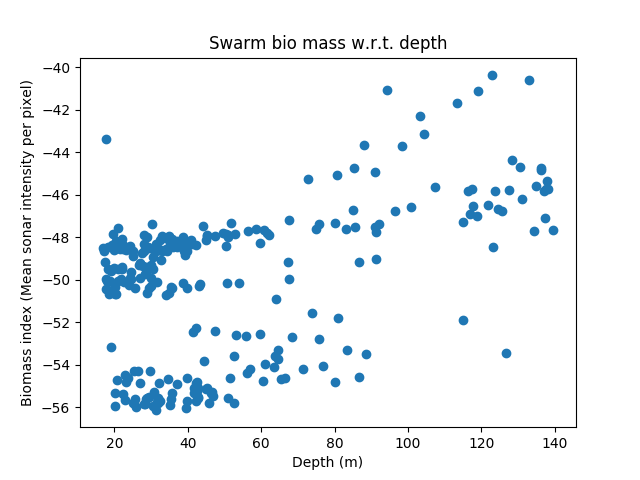

Text(0.5,1,'Swarm bio mass w.r.t. depth')

In [91]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0:# and 10*np.log10(swarm['biomass_per_pixel']/10)<0: #filter bad swarms
        if swarm['length']>0:
            D.append(swarm['depth'])
            B.append(swarm['biomass_per_pixel'])

# Bg noise          
            
            
alpha = 0.0394177
ref_depth = 100 # 100m is 537 pixels
#data_trunc_ref = cut_echogram(data,ref_depth,depth_data)
#Sv_ref = data_trunc_ref[-1,:]
Sv_ref = -53
offset = np.mean(Sv_ref)- 20* np.log10(ref_depth)-2*alpha*ref_depth
depth_start = np.min(D)
depth_stop = np.max(D)
nb_points = 100#len(data_trunc_ref[:,0]
depth_values = np.linspace(depth_start,depth_stop,nb_points)

bg_noise = offset + 20 * np.log10(depth_values) + 2 * alpha * depth_values        
            
            
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Depth (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. depth')
#plt.plot(depth_values,bg_noise,'k')

<IPython.core.display.Javascript object>


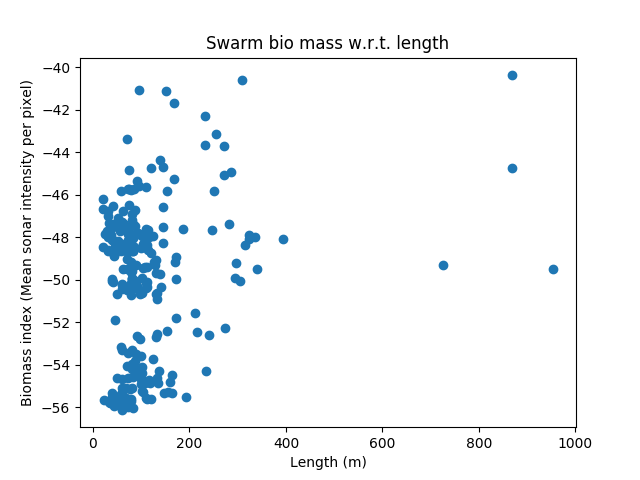

Text(0.5,1,'Swarm bio mass w.r.t. length')

In [92]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and swarm['biomass_per_pixel']<0: #filter bad swarms
        if swarm['length']>0:
            D.append(swarm['length'])
            B.append(swarm['biomass_per_pixel'])

plt.figure()
#plt.scatter(D,B)
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Length (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. length')

<IPython.core.display.Javascript object>


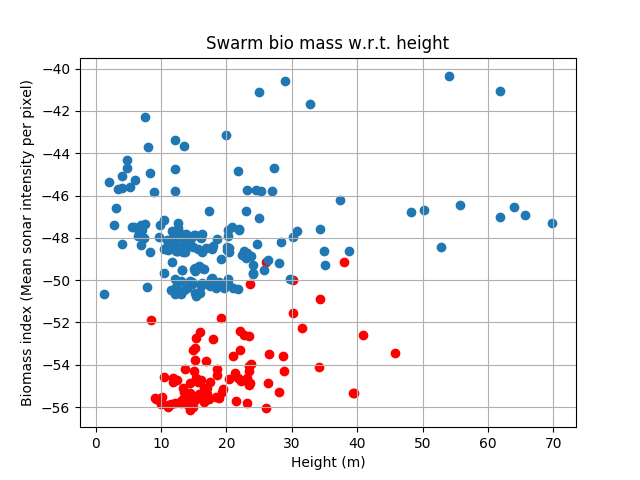

Text(0.5,1,'Swarm bio mass w.r.t. height')

In [93]:
D,B = [],[]
D2,B2 = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and swarm['biomass_per_pixel']<0: #filter bad swarms
        if swarm['length']>0:
            if swarm['longitude']<-150:
                D.append(swarm['height'])
                B.append(swarm['biomass_per_pixel'])
            else:
                D2.append(swarm['height'])
                B2.append(swarm['biomass_per_pixel'])
plt.figure()
if len(global_swarm_list)<600:
    plt.scatter(D,B,color='r')
    plt.scatter(D2,B2)
    plt.grid()
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Height (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. height')

<IPython.core.display.Javascript object>


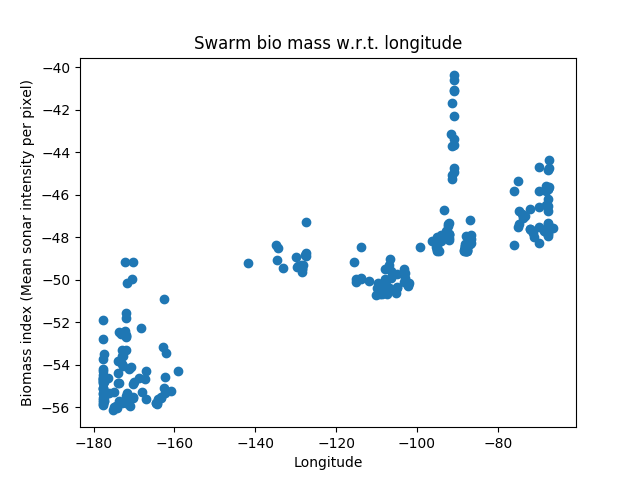

Text(0.5,1,'Swarm bio mass w.r.t. longitude')

In [94]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and swarm['biomass_per_pixel']<0: #filter bad swarms
        if swarm['length']>0 and swarm['longitude']!=0:
            D.append(swarm['longitude'])
            B.append(swarm['biomass_per_pixel'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. longitude')

<IPython.core.display.Javascript object>


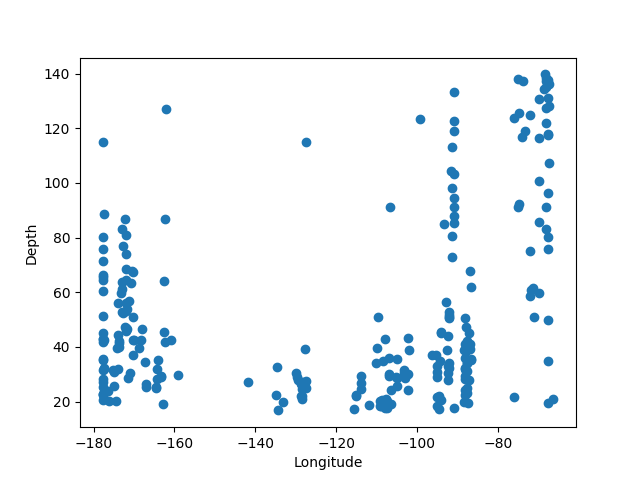

Text(0,0.5,'Depth')

In [95]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and swarm['biomass_per_pixel']<0: #filter bad swarms
        if swarm['length']>0 and swarm['longitude']!=0:
            D.append(swarm['longitude'])
            B.append(swarm['depth'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Depth')

<IPython.core.display.Javascript object>


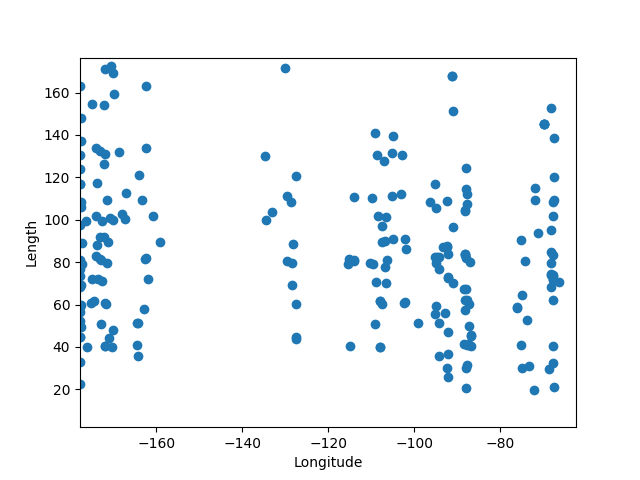

Text(0,0.5,'Length')

In [96]:
D,B = [],[]
for swarm in global_swarm_list:
    if swarm['biomass_per_pixel']!=0 and swarm['biomass_per_pixel']<0: #filter bad swarms
        if swarm['length']>0 and swarm['longitude']!=0:
            D.append(swarm['longitude'])
            B.append(swarm['length'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Length')

<IPython.core.display.Javascript object>


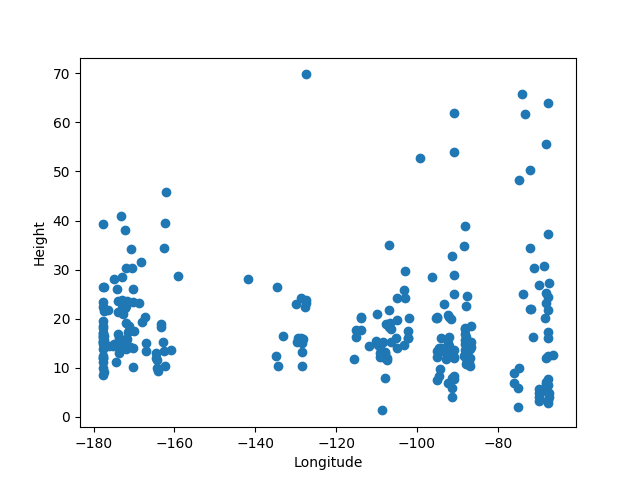

Text(0,0.5,'Height')

In [97]:
D,B = [],[]
for swarm in global_swarm_list:
        D.append(swarm['longitude'])
        B.append(swarm['height'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Height')

<IPython.core.display.Javascript object>


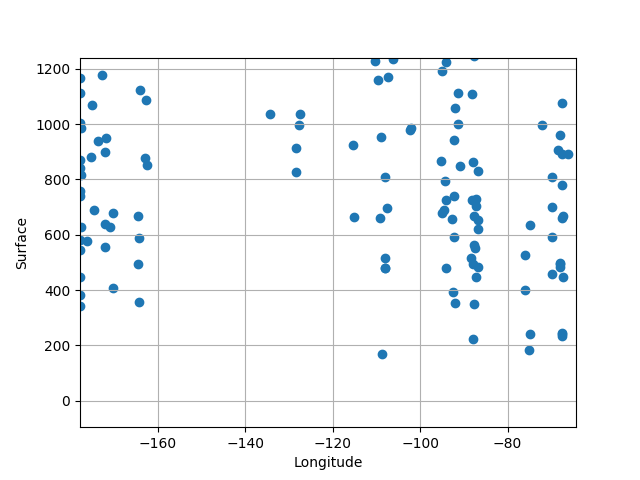

Text(0,0.5,'Surface')

In [101]:
D,B = [],[]
for swarm in global_swarm_list:
        D.append(swarm['longitude'])
        B.append(swarm['height']*swarm['length'])
plt.figure()
if len(global_swarm_list)<400:
    plt.scatter(D,B)
    plt.grid()
else:
    #plt.scatter(D,B)
    plt.hist2d(D, B, bins=(100, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Surface')

In [37]:
100*np.tan(7/360*np.pi)

6.1162620150484308

### Hour starting from sunrise

In [102]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

### UTC hour

<IPython.core.display.Javascript object>


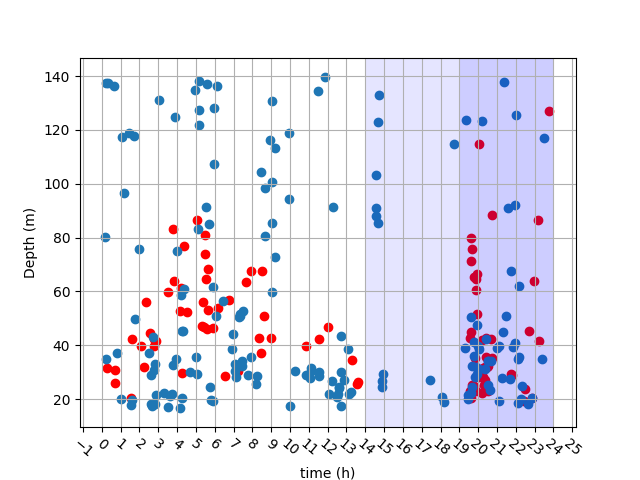

Text(0,0.5,'Depth (m)')

In [103]:
D,B = [],[]
D2,B2 = [],[]
for swarm in global_swarm_list:
    swarm_date = ACE_box.get_date(swarm['date'],swarm['time'],'000')
    sunrise,sunset = ACE_box.suntime(swarm_date,swarm['latitude'],swarm['longitude'])
    time_after_sunrise = swarm_date - sunrise
    if swarm['longitude']<-150:
        D.append(time_after_sunrise.seconds / 3600)
        B.append(swarm['depth'])
    else:
        D2.append(time_after_sunrise.seconds / 3600)
        B2.append(swarm['depth'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B,color='r')
    plt.scatter(D2,B2)
    plt.grid()
    plt.axvspan(19, 24, facecolor='b', alpha=0.1)
    plt.axvspan(14, 24, facecolor='b', alpha=0.1)    
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 30), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Depth (m)')


In [104]:
hourly_depth = ACE_box.hourly_values(global_swarm_list,'depth')

Min day duration: 14.4h, max day duration 19.5h, mean day duration: 17.1h.


<IPython.core.display.Javascript object>


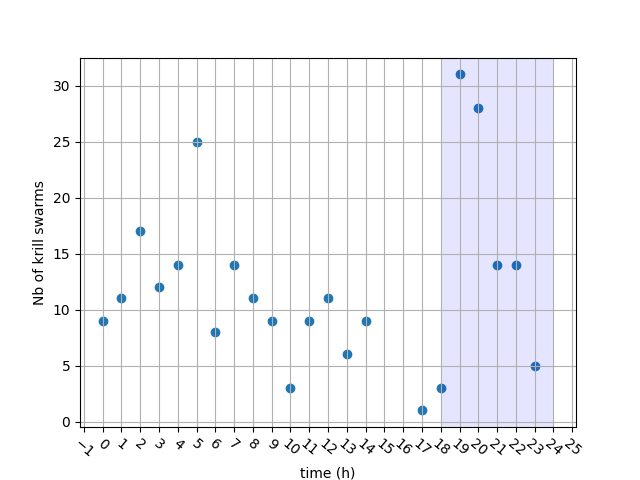

In [105]:
%matplotlib notebook
fig,ax = plt.subplots()
plt.scatter(hourly_depth[0],hourly_depth[1])
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Nb of krill swarms')
#plt.axvspan(9, 15, facecolor='b', alpha=0.1)
plt.axvspan(18, 24, facecolor='b', alpha=0.1)


<IPython.core.display.Javascript object>


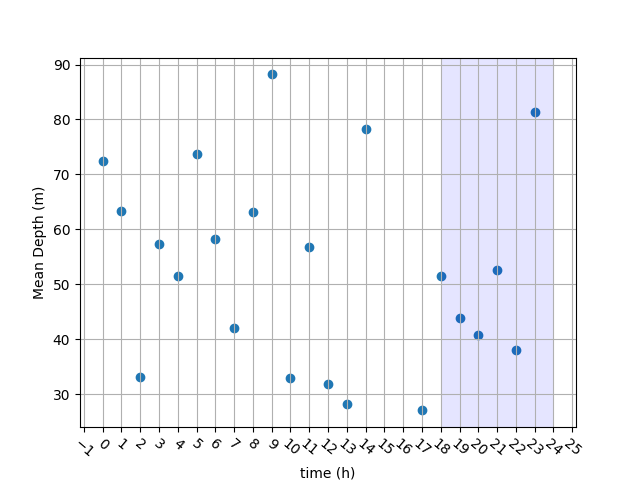

In [106]:
fig,ax = plt.subplots()
plt.scatter(hourly_depth[0],hourly_depth[2])
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Mean Depth (m)')
#plt.axvspan(-16, 0, facecolor='b', alpha=0.1)
plt.axvspan(18, 24, facecolor='b', alpha=0.1)


<IPython.core.display.Javascript object>


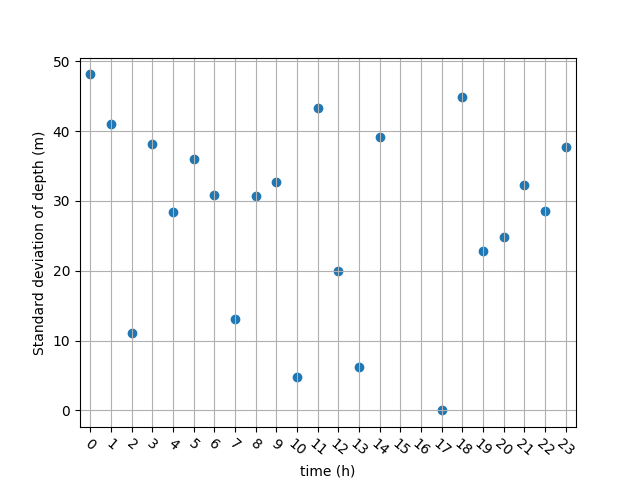

Text(0,0.5,'Standard deviation of depth (m)')

In [107]:
fig,ax = plt.subplots()
plt.scatter(hourly_depth[0],hourly_depth[3])
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlim(-0.5,23.5)
plt.xlabel('time (h)')
plt.ylabel('Standard deviation of depth (m)')

### Krill near the surface

In [108]:
surface_krill = [swarm for swarm in global_swarm_list if swarm['depth']<30]

In [109]:
surface_hourly_depth = ACE_box.hourly_values(surface_krill,'depth')

Min day duration: 14.5h, max day duration 19.5h, mean day duration: 17.5h.


<IPython.core.display.Javascript object>


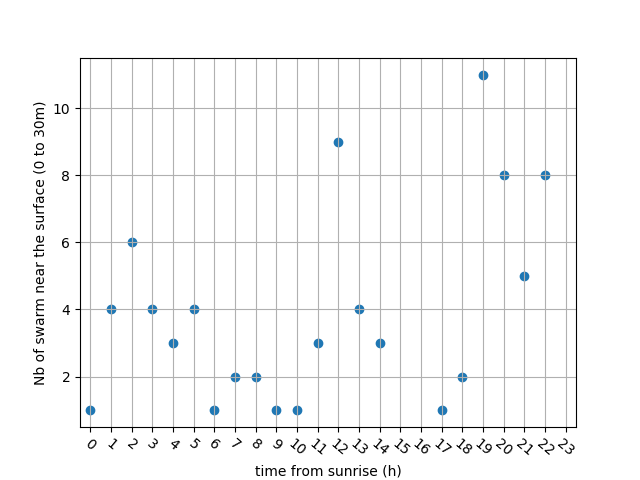

Text(0,0.5,'Nb of swarm near the surface (0 to 30m)')

In [110]:
fig,ax = plt.subplots()
plt.scatter(surface_hourly_depth[0],surface_hourly_depth[1])
plt.grid()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlim(-0.5,23.5)
plt.xlabel('time from sunrise (h)')
plt.ylabel('Nb of swarm near the surface (0 to 30m)')

<IPython.core.display.Javascript object>


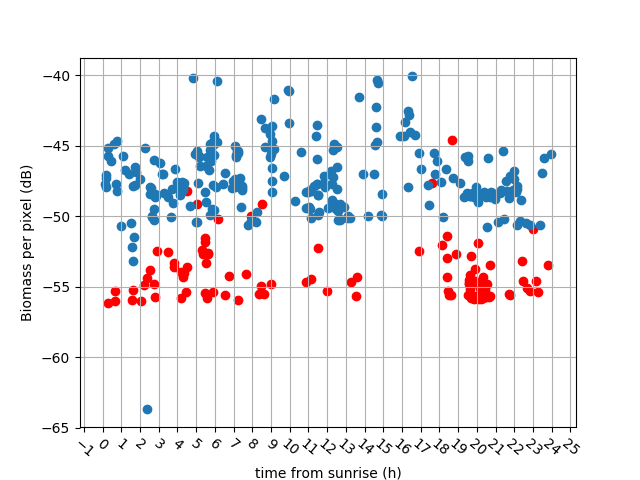

Text(0,0.5,'Biomass per pixel (dB)')

In [47]:
D,B = [],[]
D2,B2 = [],[]
for swarm in global_swarm_list:
    swarm_date = ACE_box.get_date(swarm['date'],swarm['time'],'000')
    sunrise,sunset = ACE_box.suntime(swarm_date,swarm['latitude'],swarm['longitude'])
    time_after_sunrise = swarm_date - sunrise
    if swarm['longitude']<-150:
        D.append(time_after_sunrise.seconds / 3600)
        B.append(swarm['biomass_per_pixel'])
    else:
        D2.append(time_after_sunrise.seconds / 3600)
        B2.append(swarm['biomass_per_pixel'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B,color='r')
    plt.scatter(D2,B2)
    plt.grid()
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 30), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time from sunrise (h)')
plt.ylabel('Biomass per pixel (dB)')
#plt.axvspan(9, 15, facecolor='b', alpha=0.1)

<IPython.core.display.Javascript object>


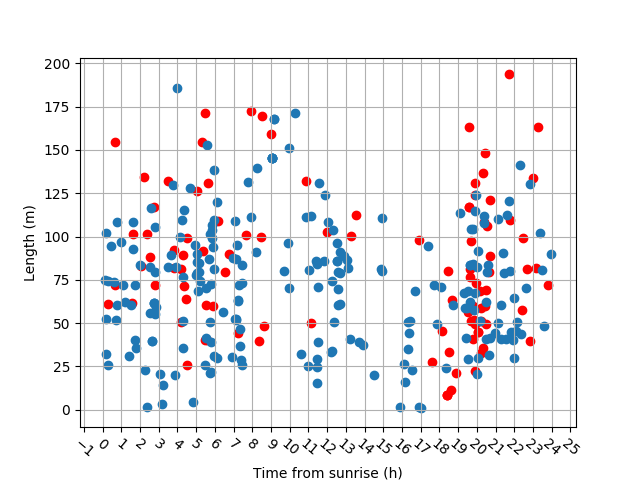

Text(0,0.5,'Length (m)')

In [48]:
D,B = [],[]
D2,B2 = [],[]
for swarm in global_swarm_list:
    if swarm['length']<200:
        swarm_date = ACE_box.get_date(swarm['date'],swarm['time'],'000')
        sunrise,sunset = ACE_box.suntime(swarm_date,swarm['latitude'],swarm['longitude'])
        time_after_sunrise = swarm_date - sunrise
        if swarm['longitude']<-150:
            D.append(time_after_sunrise.seconds / 3600)
            B.append(swarm['length'])
        else:
            D2.append(time_after_sunrise.seconds / 3600)
            B2.append(swarm['length'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B,color='r')
    plt.scatter(D2,B2)
    plt.grid()
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 20), cmap=plt.cm.jet)
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('Time from sunrise (h)')
plt.ylabel('Length (m)')
#plt.axvspan(9, 15, facecolor='b', alpha=0.1)

<IPython.core.display.Javascript object>


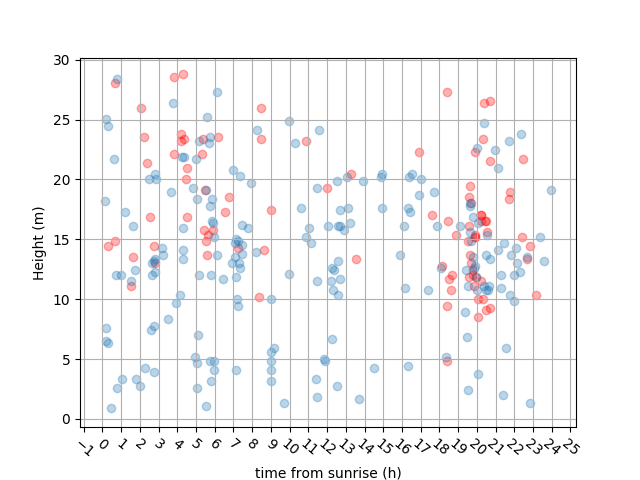

Text(0,0.5,'Height (m)')

In [51]:
D,B = [],[]
D2,B2 = [],[]
for swarm in global_swarm_list:
    if swarm['length']<200 and swarm['height']<30:
        swarm_date = ACE_box.get_date(swarm['date'],swarm['time'],'000')
        sunrise,sunset = ACE_box.suntime(swarm_date,swarm['latitude'],swarm['longitude'])
        time_after_sunrise = swarm_date - sunrise
        if swarm['longitude']<-150:
            D.append(time_after_sunrise.seconds / 3600)
            B.append(swarm['height'])
        else:
            D2.append(time_after_sunrise.seconds / 3600)
            B2.append(swarm['height'])
fig,ax = plt.subplots()
if len(global_swarm_list)<400:
    plt.scatter(D,B,color='red',alpha=0.3)
    plt.scatter(D2,B2,alpha=0.3)
    plt.grid()
else:
    #plt.scatter(D,B,alpha=0.3)
    plt.hist2d(D, B, bins=(24, 30), normed=False, cmap=plt.cm.jet)
    plt.colorbar()
plt.xticks(rotation=-40)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.xlim(-0.5,23.5)
plt.xlabel('time from sunrise (h)')
plt.ylabel('Height (m)')
#plt.axvspan(9, 15, facecolor='b', alpha=0.1)
#plt.colorbar()

In [59]:
plt.hist2d?